In [7]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import ensemble, tree, metrics
from mlxtend.evaluate import bias_variance_decomp

import matplotlib.pyplot as plt


First, always import necessary libaries
Second, load data and process it

In [8]:

data = pd.read_csv('/home/george/Course/dda3030/assignments/assignment3/Carseats.csv')
data = data.reset_index()
data.drop(data.columns[[0]], axis=1, inplace=True)
data.loc[data.ShelveLoc == 'Good', 'ShelveLoc'] = 2
data.loc[data.ShelveLoc == 'Medium', 'ShelveLoc'] = 1
data.loc[data.ShelveLoc == 'Bad', 'ShelveLoc'] = 0
data['ShelveLoc'] = data['ShelveLoc'].astype(int)
data.loc[data.Urban == 'Yes', 'Urban'] = 1
data.loc[data.Urban == 'No', 'Urban'] = 0
data['Urban'] = data['Urban'].astype(int)
data.loc[data.US == 'Yes', "US"] = 1
data.loc[data.US == 'No', "US"] = 0
data['US'] = data['US'].astype(int)
dataset = data.values
X_train = dataset[:300, 1:]
Y_train = dataset[:300, 0]
X_test = dataset[300:, 1:]
Y_test = dataset[300:, 0]

Define the function for decision tree

In [9]:
def decisionTree(maxDepth, lstNodeSize, X_train, Y_train):
        clf = tree.DecisionTreeRegressor(
            max_depth=maxDepth, min_samples_leaf=lstNodeSize, random_state=0)
        clf.fit(X_train, Y_train)
        print('accuracy: ', clf.score(X_train, Y_train))
        plt.figure(figsize=(20, 10))
        tree.plot_tree(clf, filled=True)
        print(" maximum depth: ",
              maxDepth, "least node size: ", lstNodeSize)
        print("The train error(SSE) is: ", metrics.mean_squared_error(
            clf.predict(X_train), Y_train)*300)
        print("The test error(SSE) is: ", metrics.mean_squared_error(
            clf.predict(X_test), Y_test)*100)

Then, just run the decision tree function with different maxD and lstND

accuracy:  0.646766981482123
 maximum depth:  4 least node size:  2
The train error(SSE) is:  849.0020099248911
The test error(SSE) is:  546.1879774411962
accuracy:  0.6131713256430399
 maximum depth:  4 least node size:  7
The train error(SSE) is:  929.7497821796044
The test error(SSE) is:  505.91763380935265
accuracy:  0.5980822226526437
 maximum depth:  4 least node size:  12
The train error(SSE) is:  966.0167167390126
The test error(SSE) is:  545.3348028542797
accuracy:  0.5778880607978317
 maximum depth:  4 least node size:  17
The train error(SSE) is:  1014.5537534957172
The test error(SSE) is:  519.2025002466738
accuracy:  0.8211145064063827
 maximum depth:  6 least node size:  2
The train error(SSE) is:  429.95455024174345
The test error(SSE) is:  507.7392397027345
accuracy:  0.7516359718724144
 maximum depth:  6 least node size:  7
The train error(SSE) is:  596.9474766490176
The test error(SSE) is:  453.5706601247872
accuracy:  0.6900741089617951
 maximum depth:  6 least node 

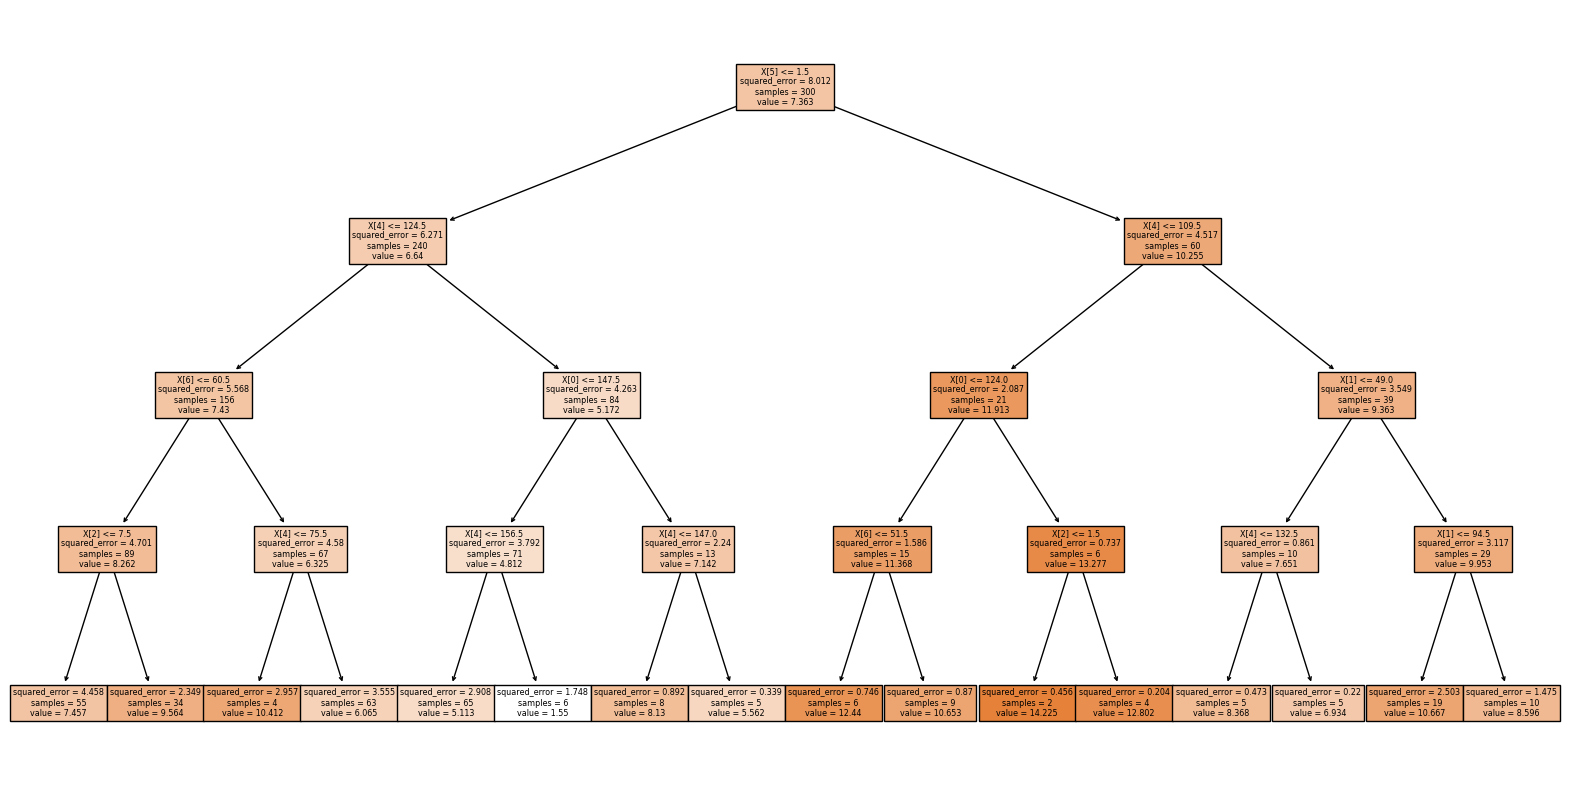

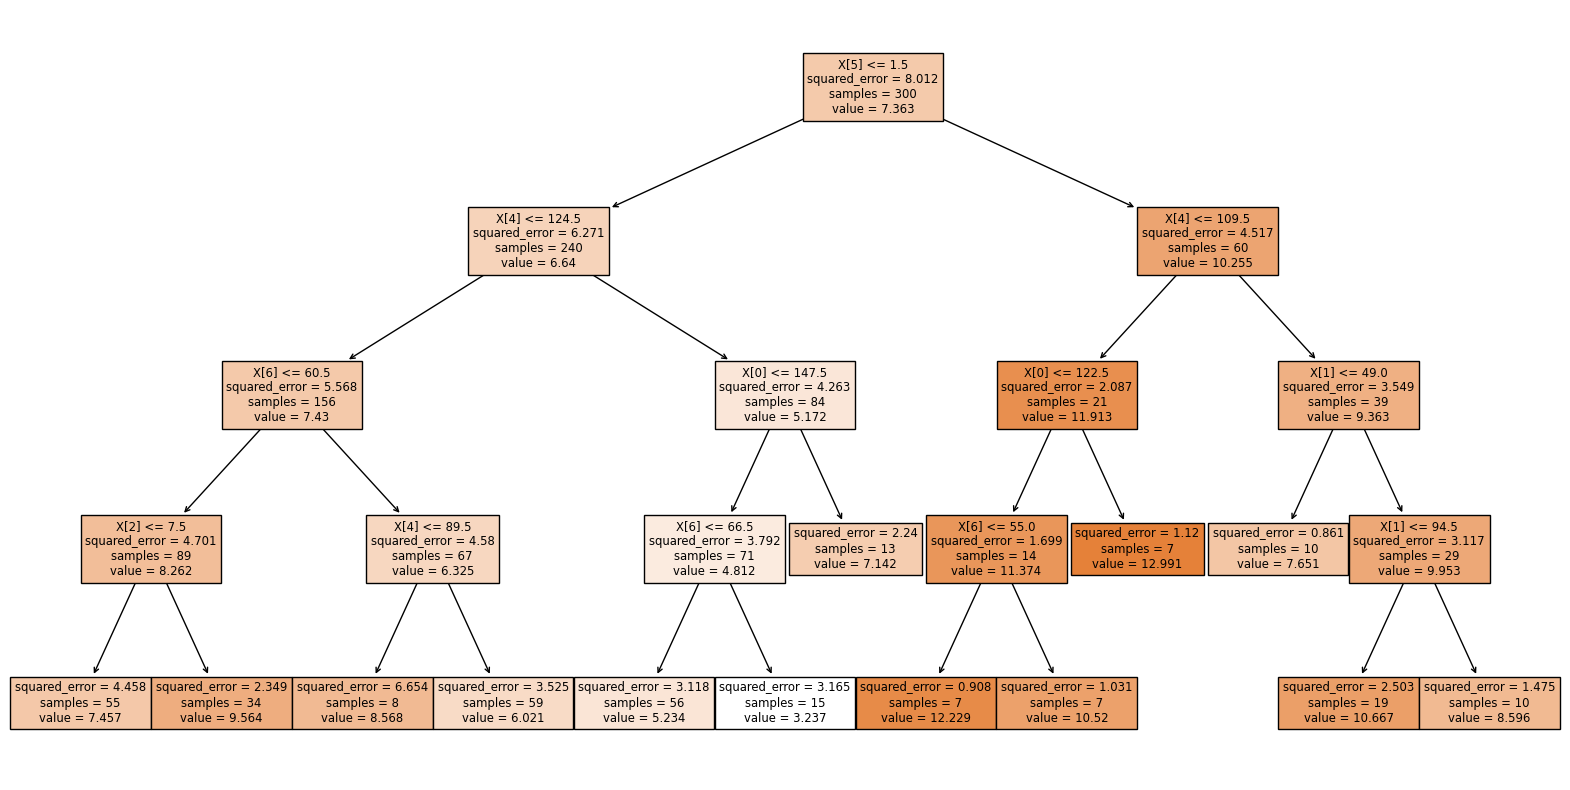

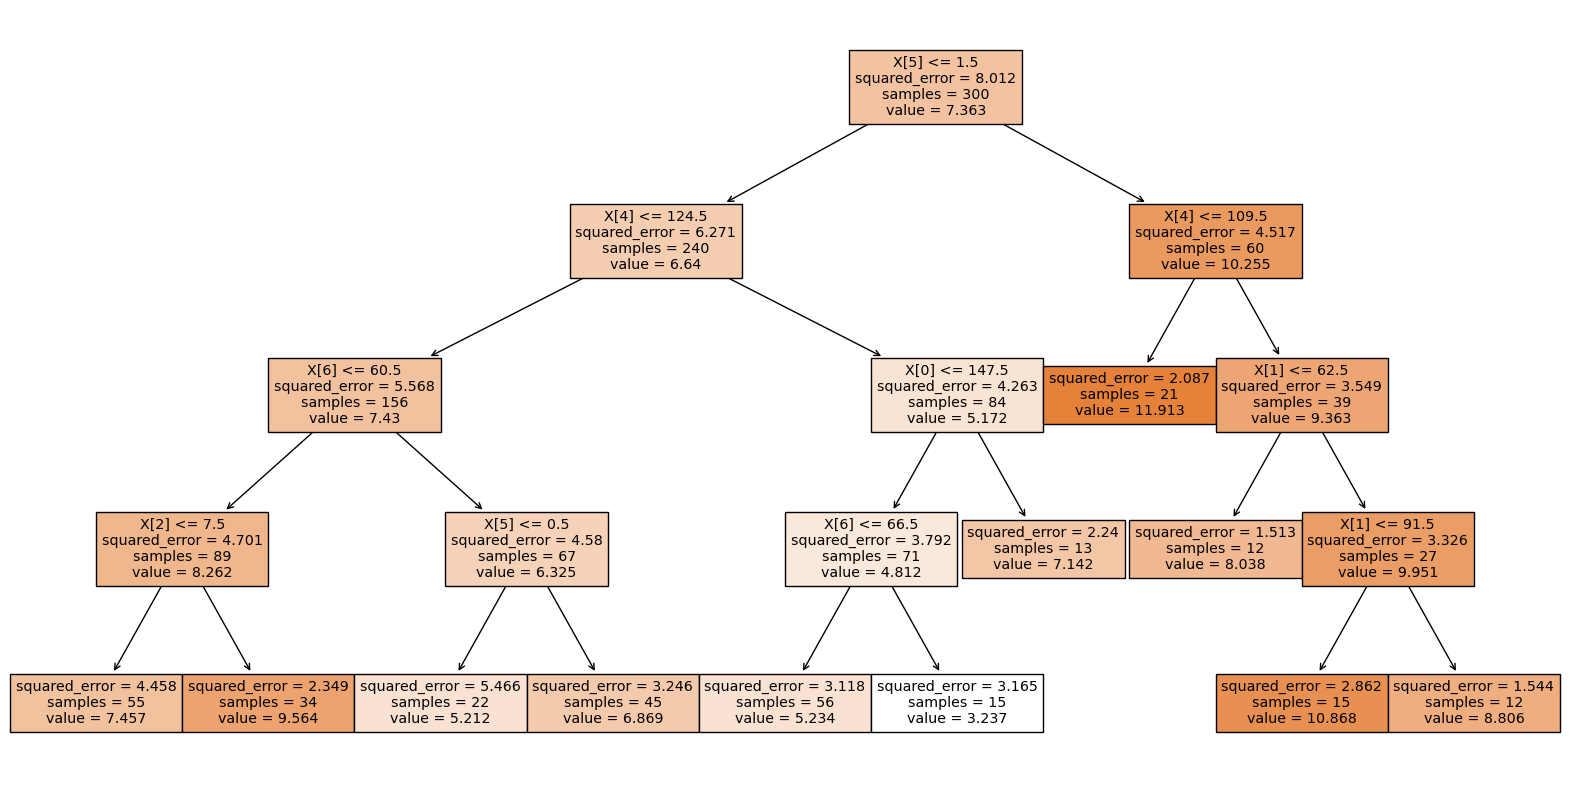

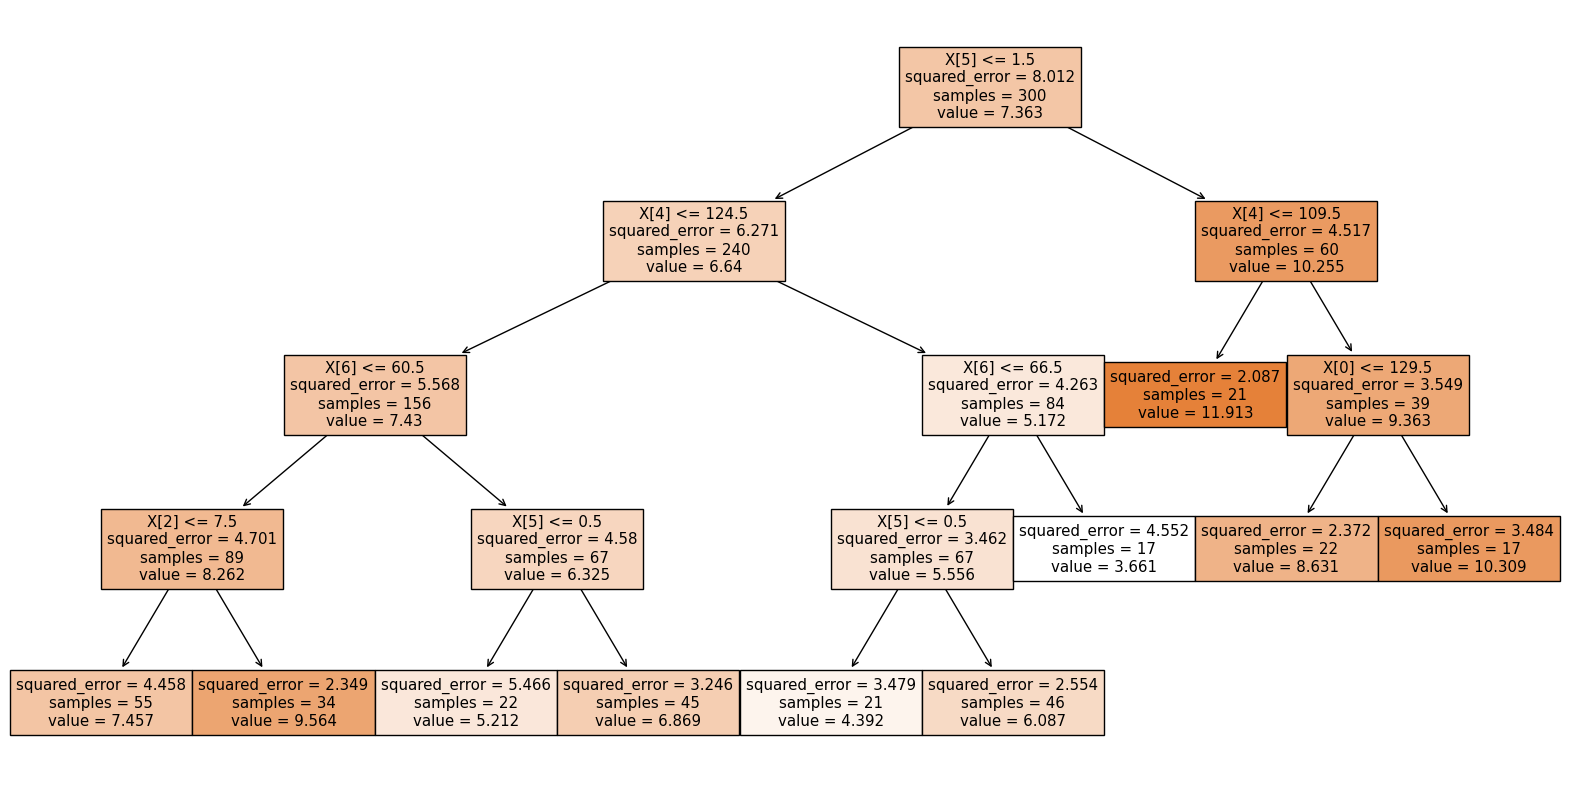

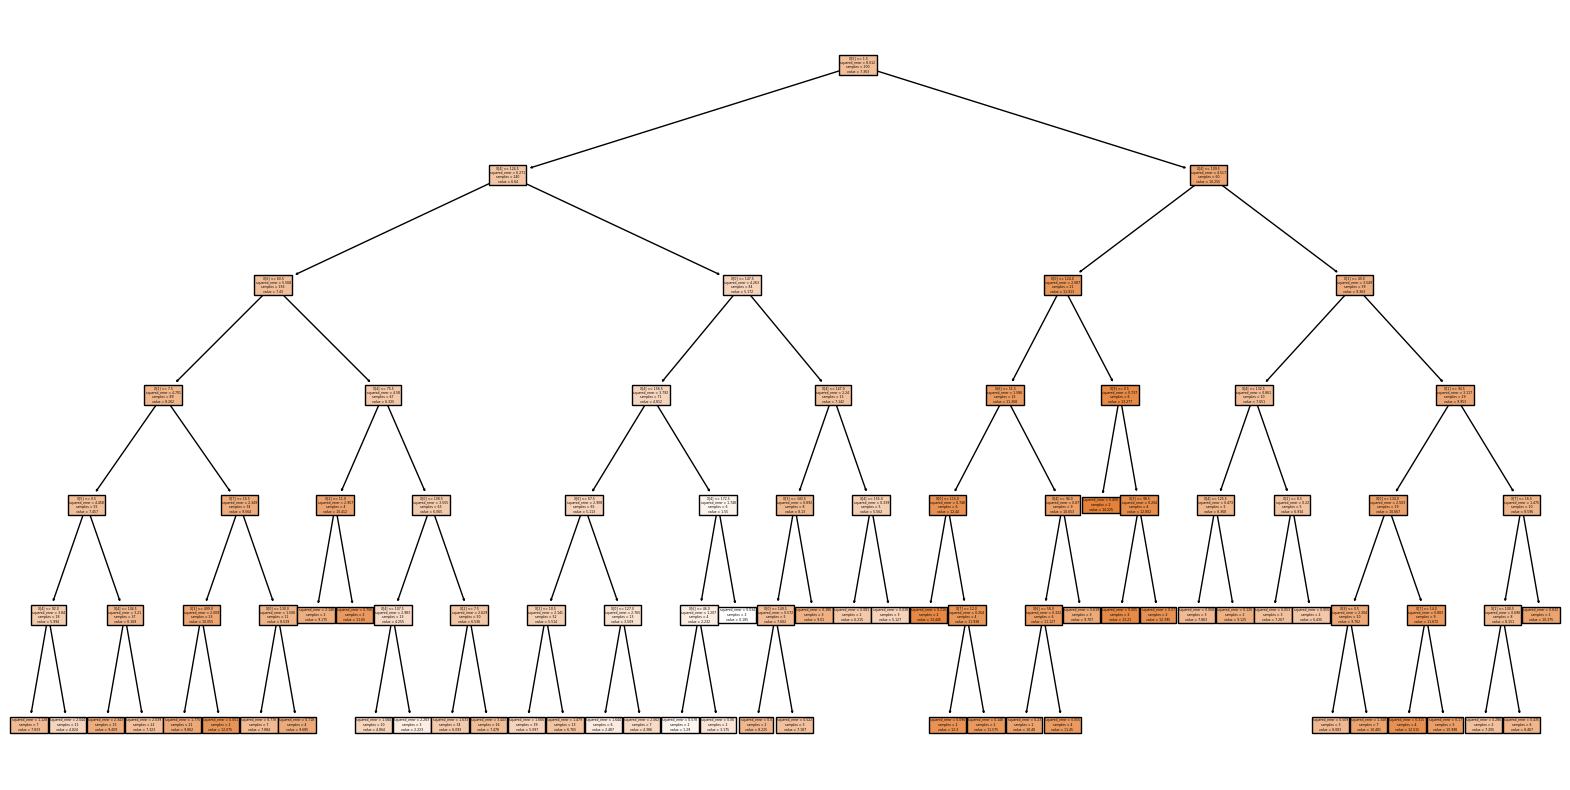

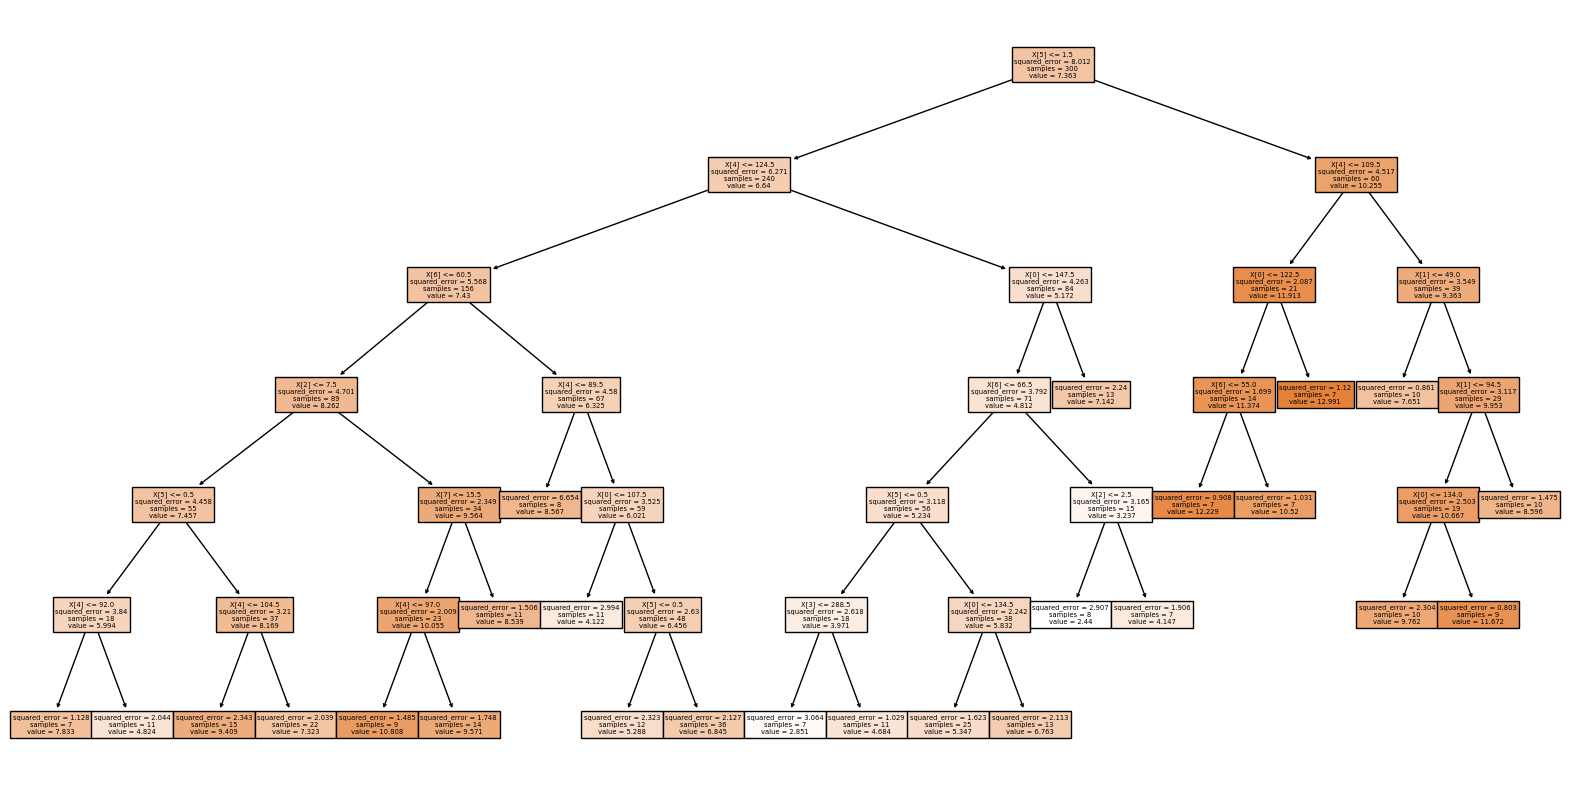

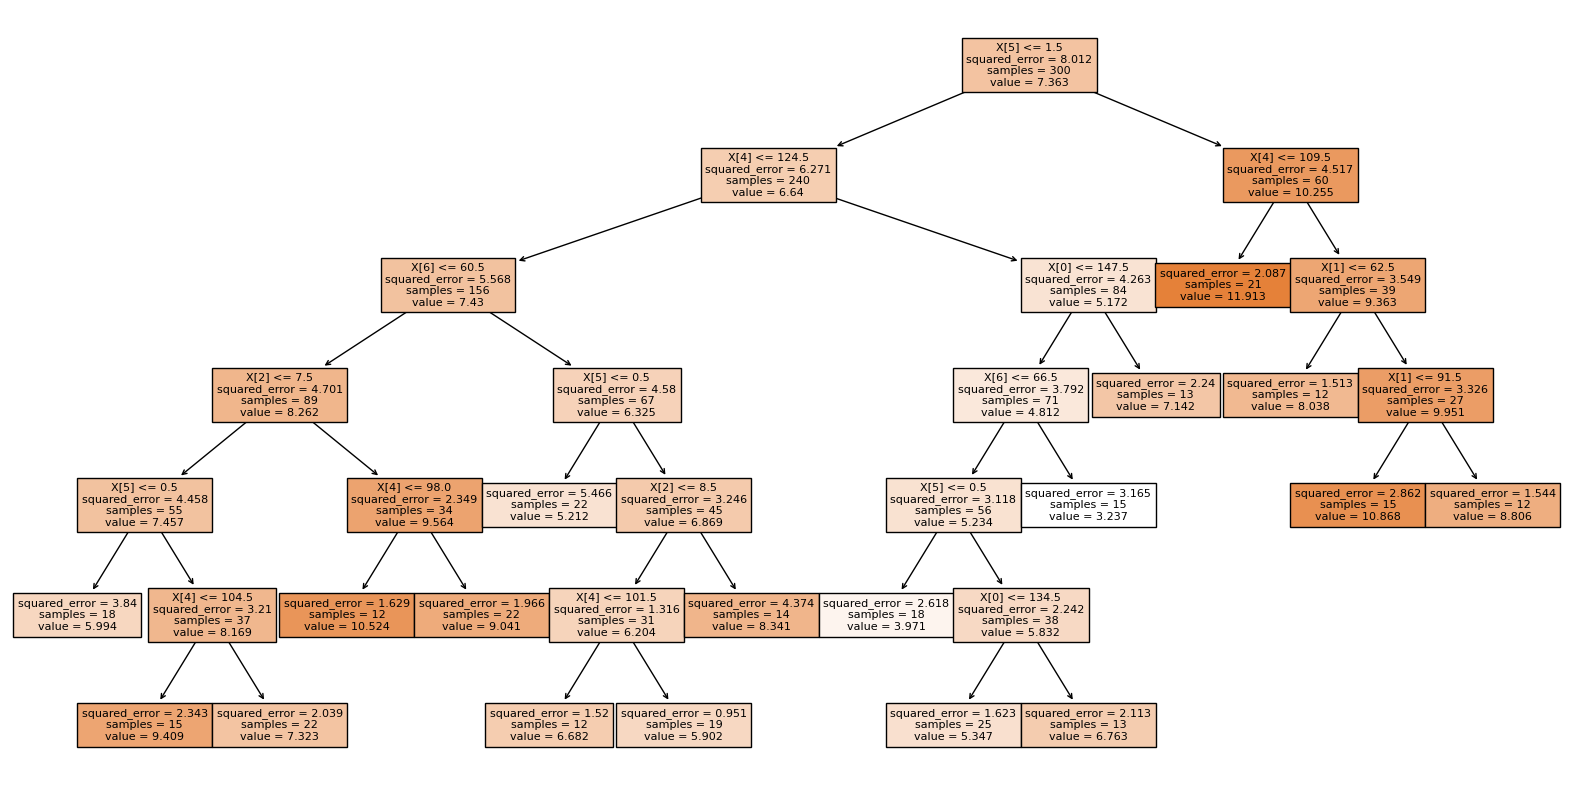

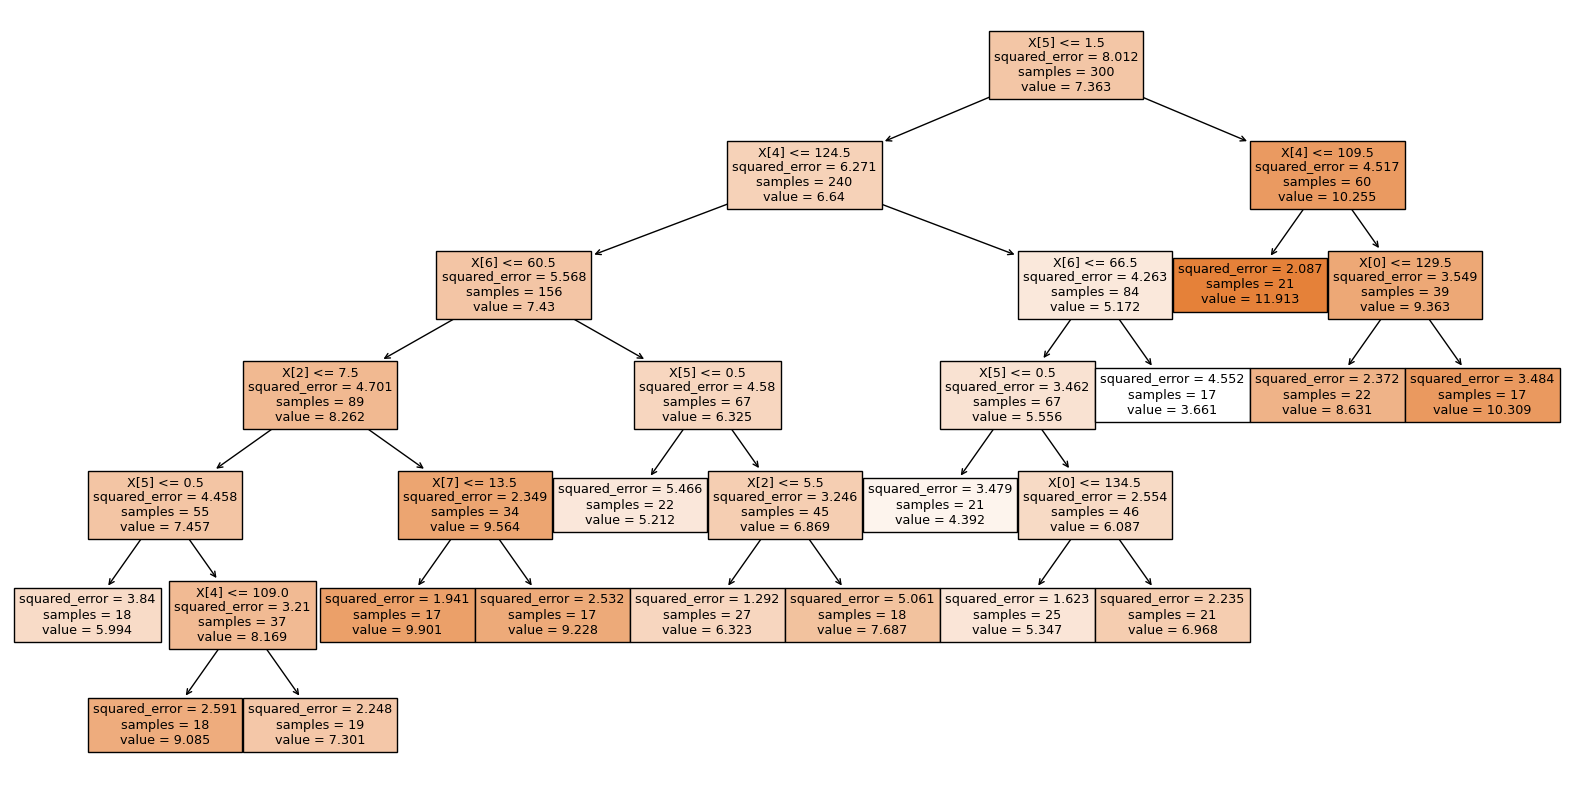

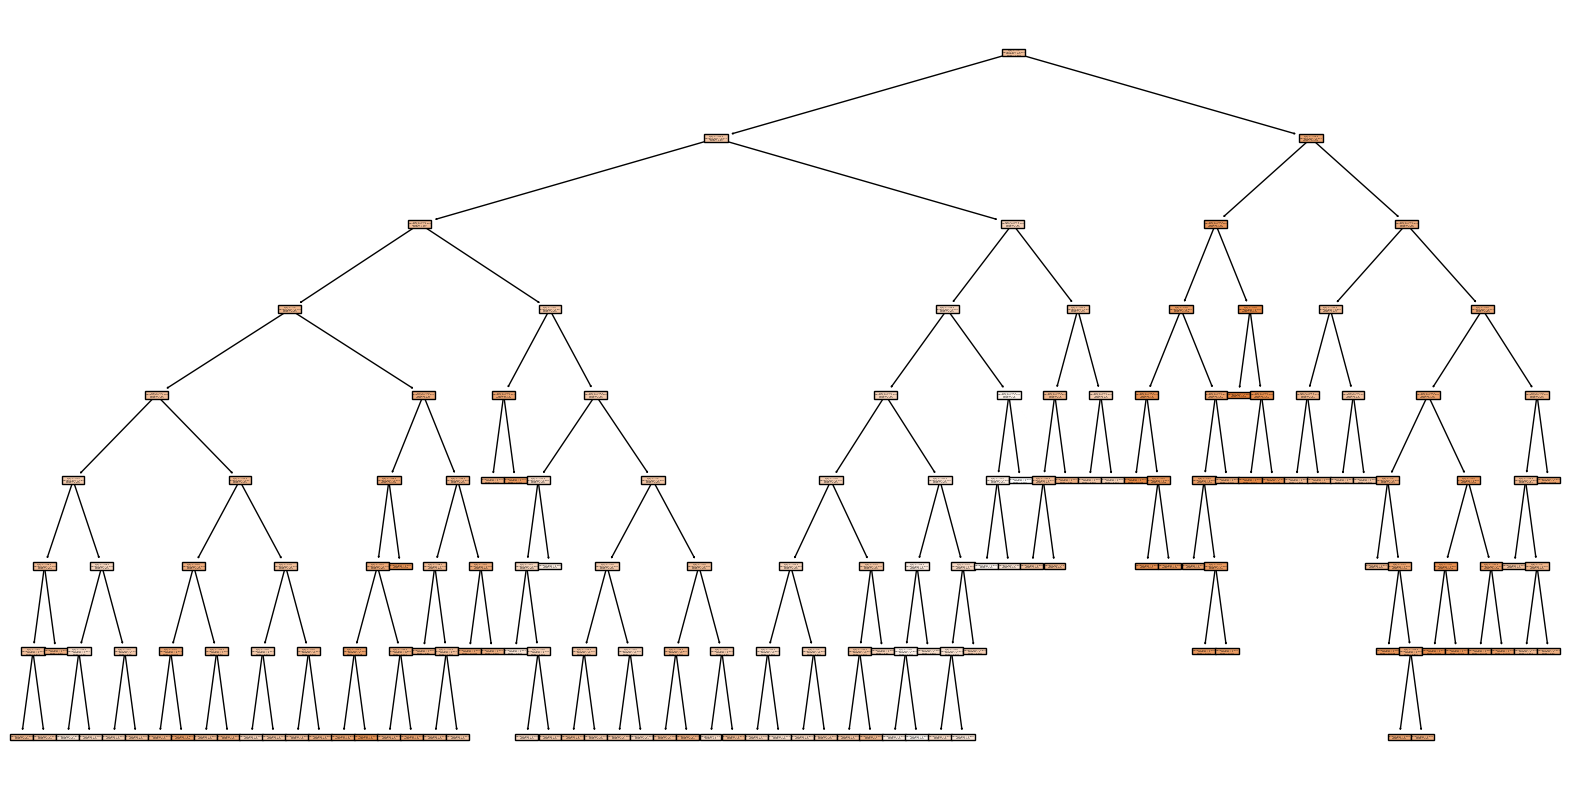

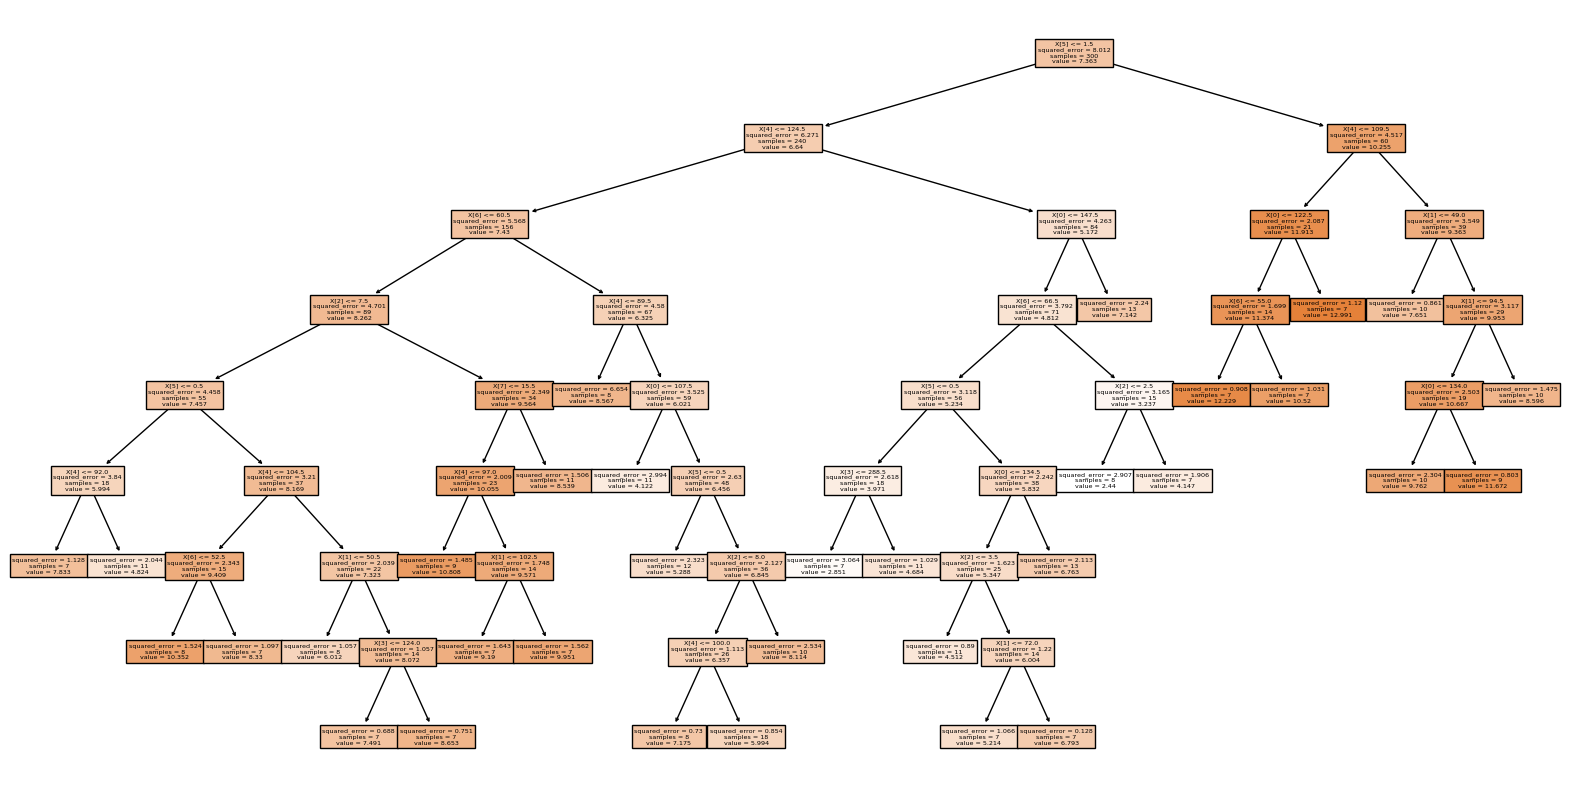

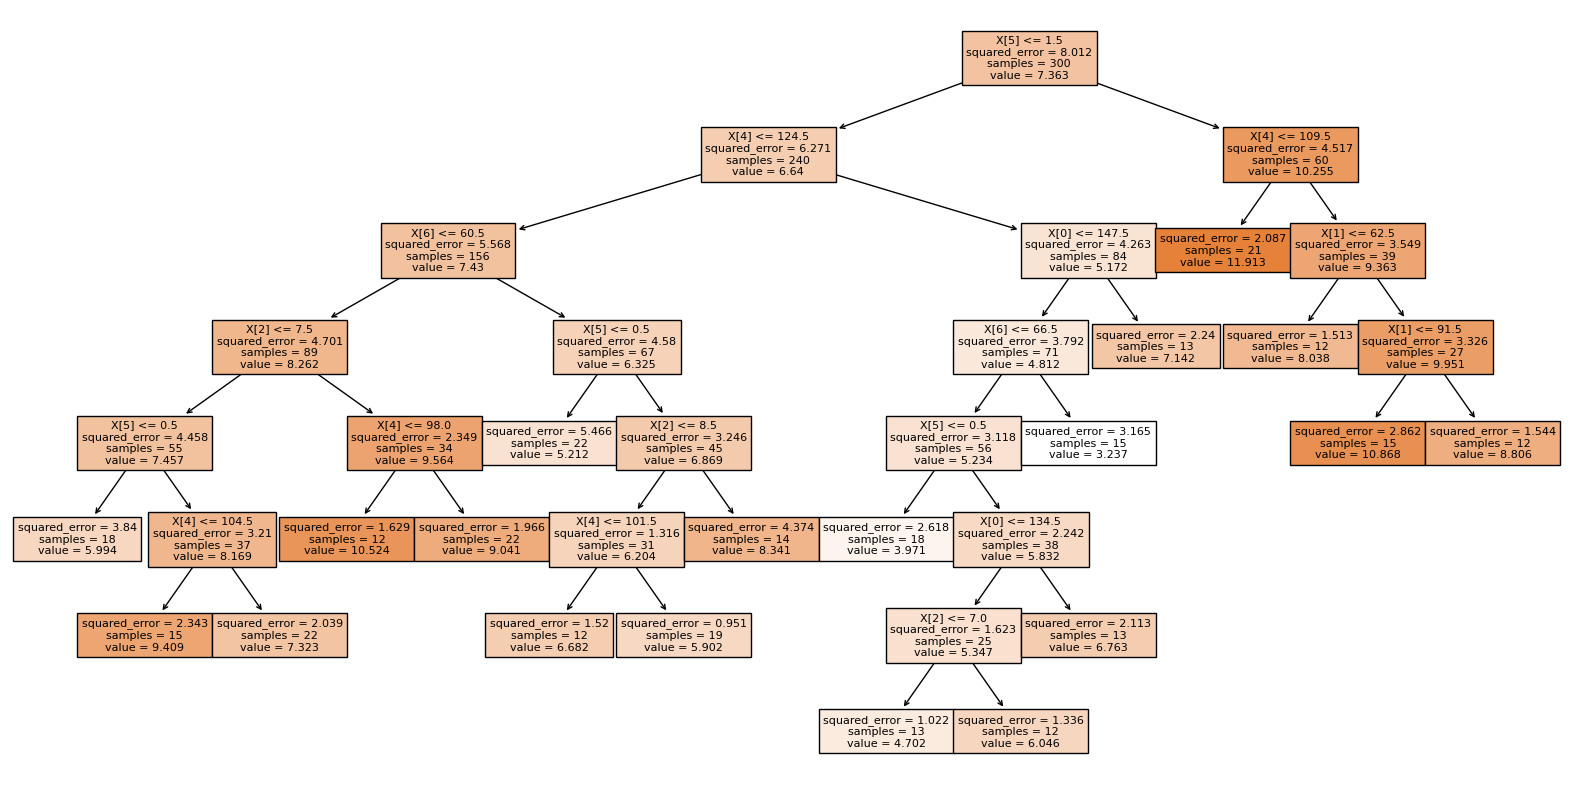

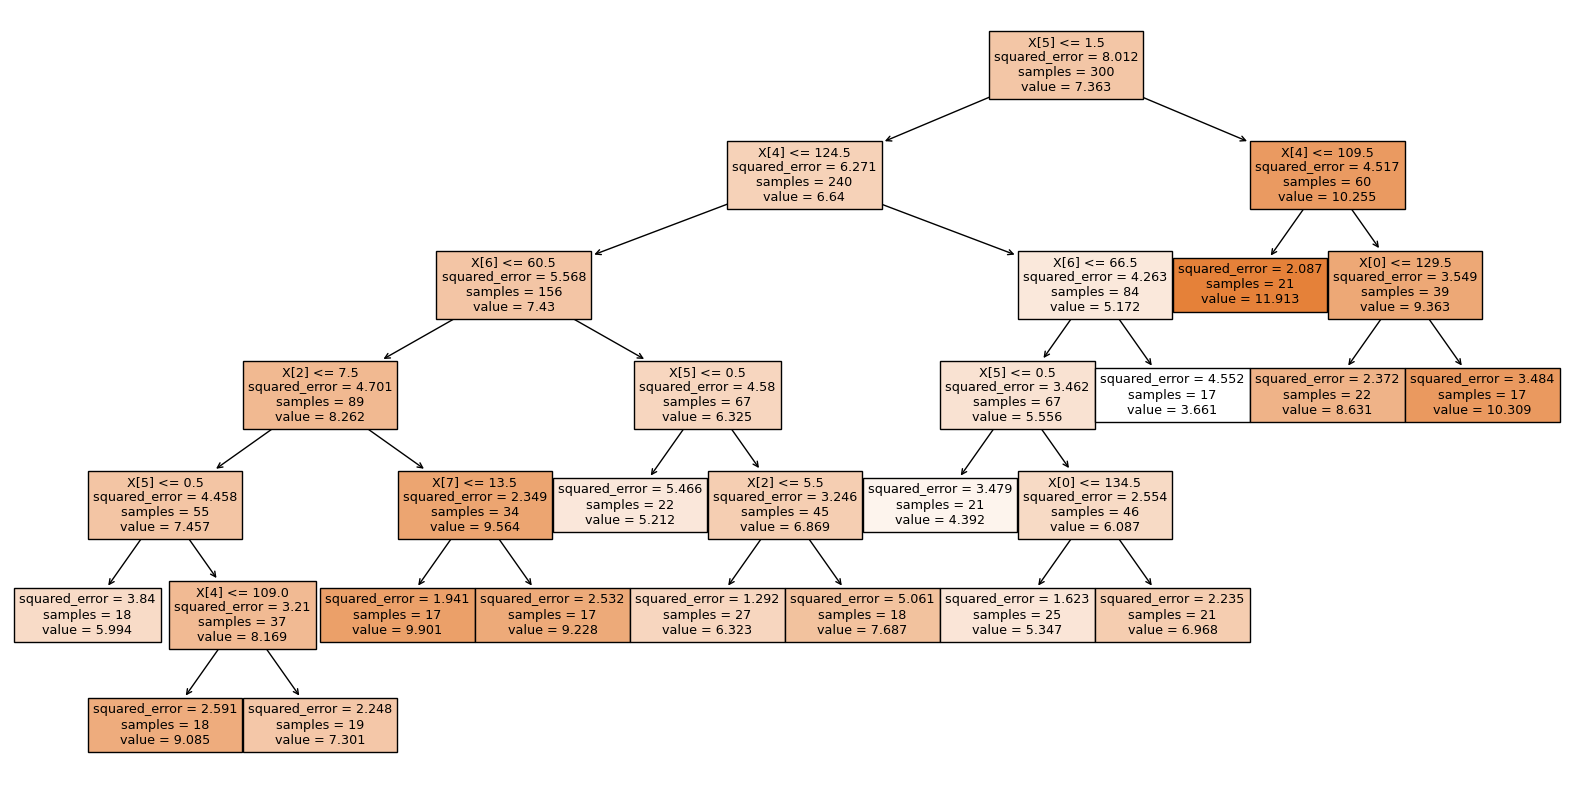

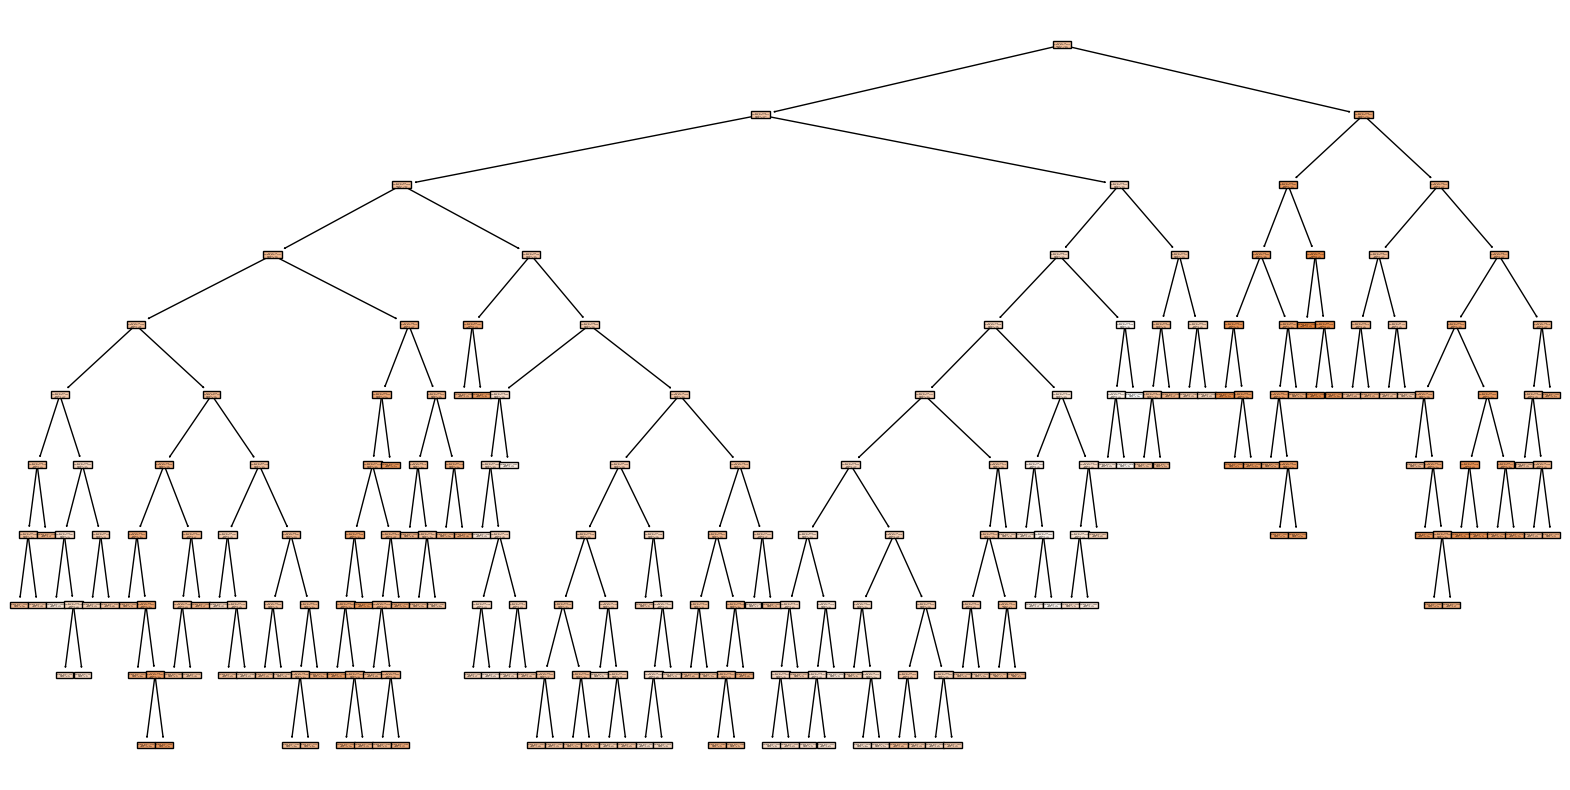

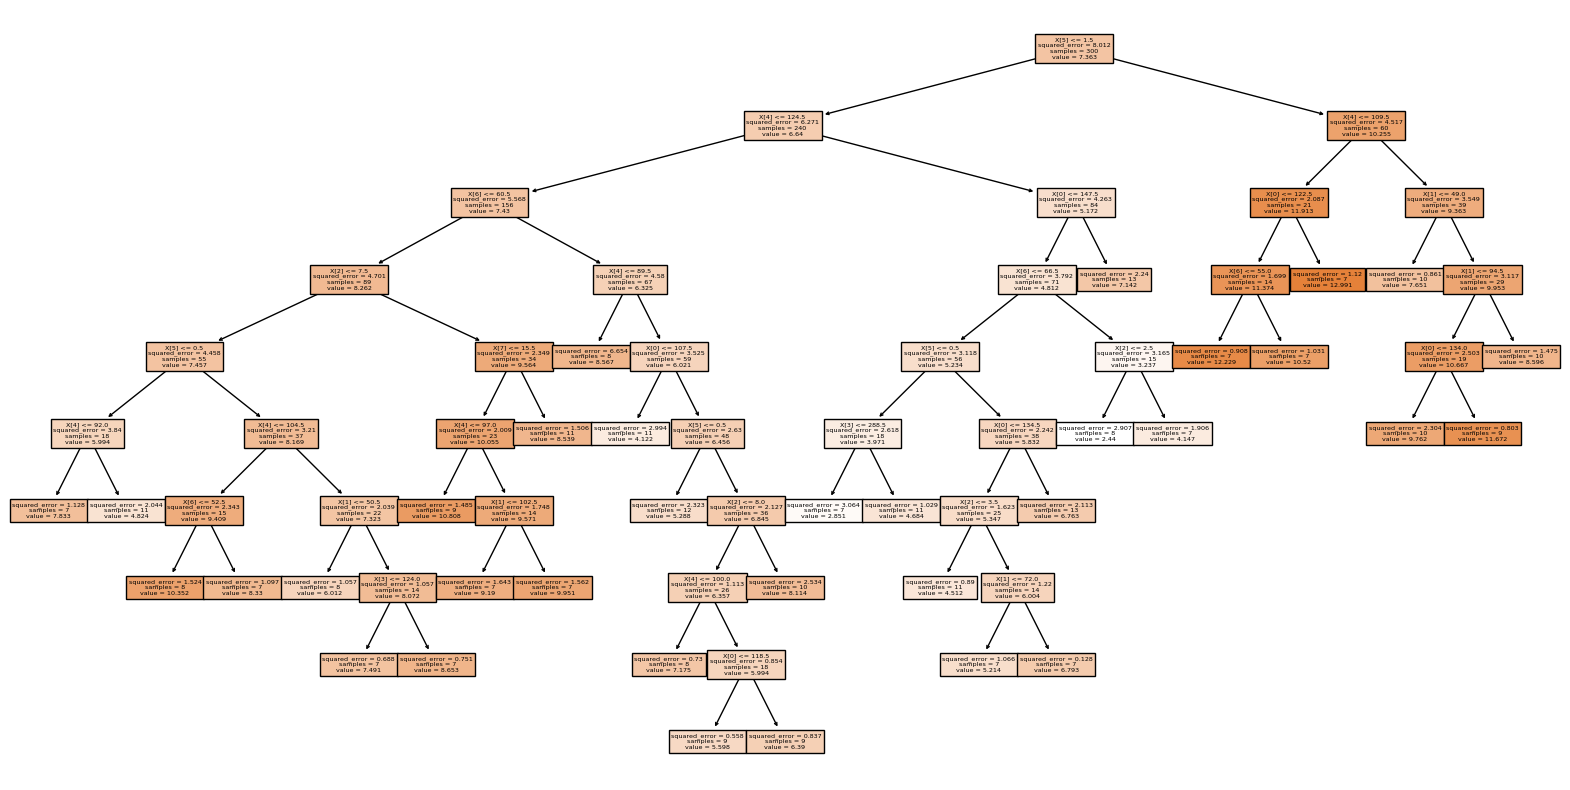

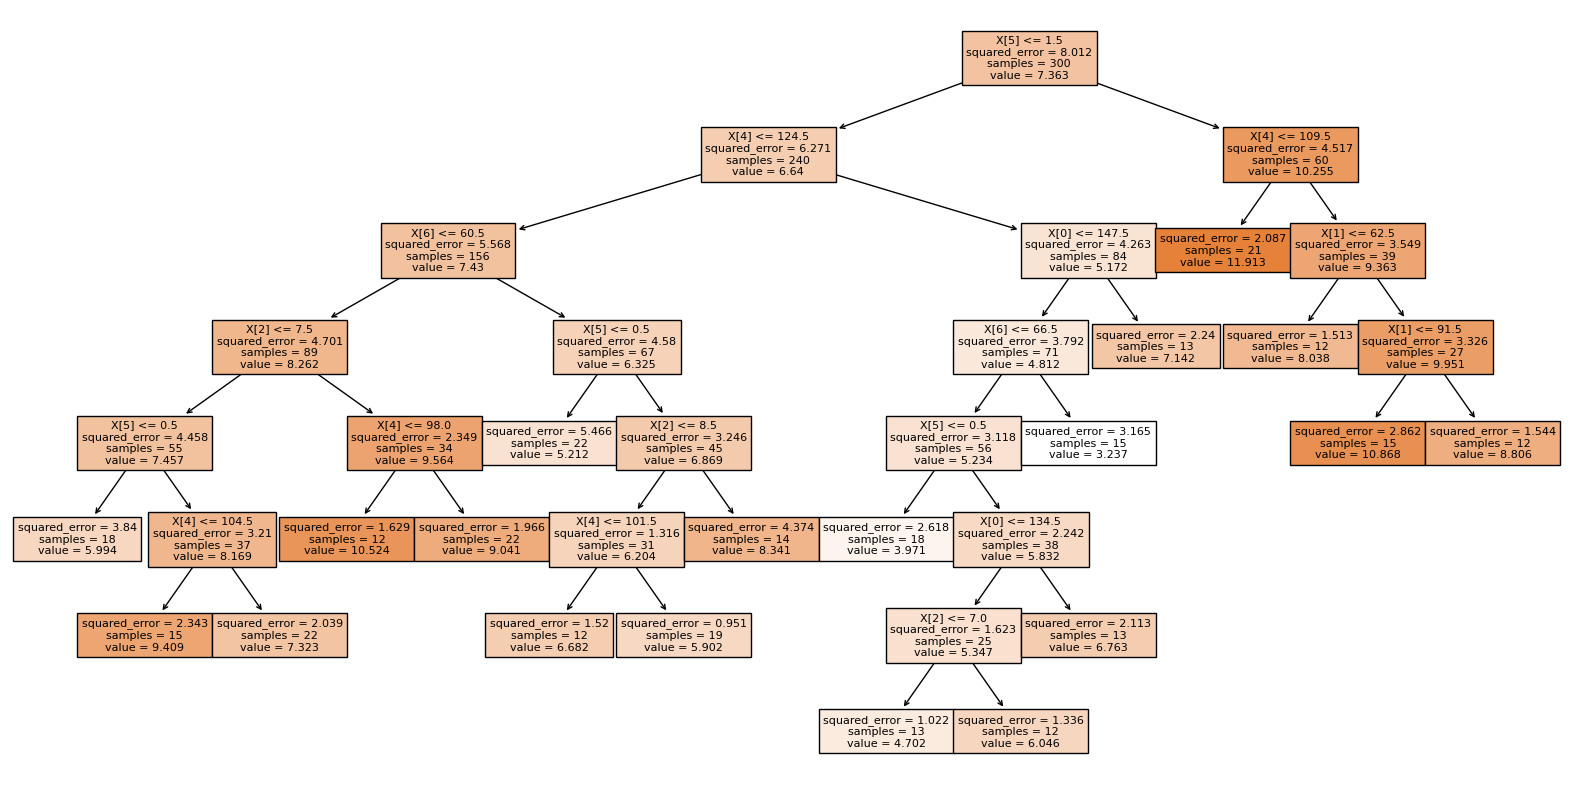

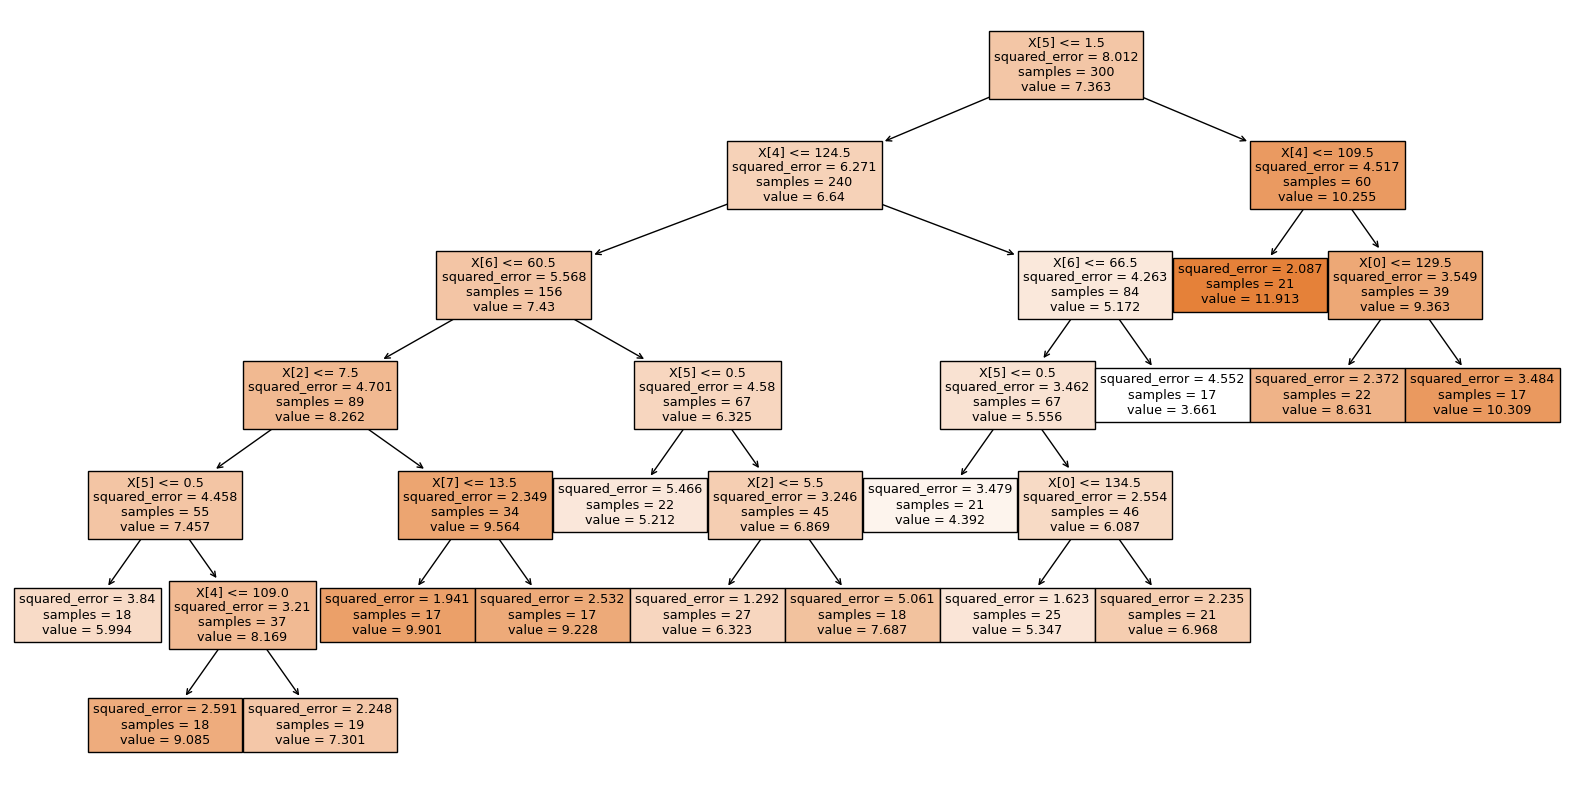

In [10]:
for maxD in range(4, 11, 2):
    for lstNd in range(2, 20, 5):
        decisionTree(maxD, lstNd,X_train,Y_train)

Next, define the function for bagging

In [11]:
def baggingOfTrees(numOfTree, maxDepth,X_train, Y_train):
        regressor = tree.DecisionTreeRegressor(
            max_depth=maxDepth, random_state=0)
        clf = ensemble.BaggingRegressor(
            base_estimator=regressor, n_estimators=numOfTree, random_state=0)
        clf.fit(X_train, Y_train)
        print("bagging with ", numOfTree,
              " trees, maximum depth:  ", maxDepth)
        print("maximum depth: ", maxDepth)
        print("number of trees: ", numOfTree)
        print("train error(SSE): ", metrics.mean_squared_error(
            clf.predict(X_train), Y_train)*300)
        print("test error(SSE): ", metrics.mean_squared_error(
            clf.predict(X_test), Y_test)*100)

Then, run the code with different parameters

In [12]:
for numOfT in range(10, 51, 10):
    for maxD in range(4, 11, 2):
        baggingOfTrees(numOfT, maxD, X_train, Y_train)

bagging with  10  trees, maximum depth:   4
maximum depth:  4
number of trees:  10
train error(SSE):  662.2698190894223
test error(SSE):  395.9451713500158
bagging with  10  trees, maximum depth:   6
maximum depth:  6
number of trees:  10
train error(SSE):  316.1809498636393
test error(SSE):  347.7316176331033
bagging with  10  trees, maximum depth:   8
maximum depth:  8
number of trees:  10
train error(SSE):  207.8267860798477
test error(SSE):  331.69850920953724
bagging with  10  trees, maximum depth:   10
maximum depth:  10
number of trees:  10
train error(SSE):  171.04150375726485
test error(SSE):  313.9063189473779
bagging with  20  trees, maximum depth:   4
maximum depth:  4
number of trees:  20
train error(SSE):  633.7539833790918
test error(SSE):  387.7571026289789
bagging with  20  trees, maximum depth:   6
maximum depth:  6
number of trees:  20
train error(SSE):  293.7715568424719
test error(SSE):  327.9575560771774
bagging with  20  trees, maximum depth:   8
maximum depth:  

Define function for random forest

In [13]:
def randomForests(numOfTree, m, X_train, Y_train):
        clf = ensemble.RandomForestRegressor(
            n_estimators=numOfTree, max_features=m, random_state=0)
        clf.fit(X_train, Y_train)
        print("For the random forests with ", numOfTree, " trees and m = ", m)
        print("The train error(SSE) is: ", metrics.mean_squared_error(
            clf.predict(X_train), Y_train)*300)
        print("The test error(SSE) is: ", metrics.mean_squared_error(
            clf.predict(X_test), Y_test)*100)

Run the function with different parameters

In [14]:
for numOfT in range(10, 51, 10):
    for m in range(2, 10, 2):
        randomForests(numOfT, m, X_train, Y_train)

For the random forests with  10  trees and m =  2
The train error(SSE) is:  219.55220900000003
The test error(SSE) is:  365.71494099999995
For the random forests with  10  trees and m =  4
The train error(SSE) is:  152.413657
The test error(SSE) is:  314.09674499999994
For the random forests with  10  trees and m =  6
The train error(SSE) is:  133.21877200000003
The test error(SSE) is:  298.196331
For the random forests with  10  trees and m =  8
The train error(SSE) is:  157.53520300000002
The test error(SSE) is:  319.940107
For the random forests with  20  trees and m =  2
The train error(SSE) is:  167.12490150000008
The test error(SSE) is:  338.1690647499999
For the random forests with  20  trees and m =  4
The train error(SSE) is:  136.84896925000004
The test error(SSE) is:  272.1940529999999
For the random forests with  20  trees and m =  6
The train error(SSE) is:  124.65462425000001
The test error(SSE) is:  256.53885999999994
For the random forests with  20  trees and m =  8
The

Last, define the function for curve fitting

In [15]:
def curves(X_train, Y_train, X_test, Y_test):
        numOfTrees = range(10, 101, 10)
        bias = []
        variance = []
        for i in numOfTrees:
            forest = ensemble.RandomForestRegressor(
                n_estimators=i, random_state=0)
            mse, b, var = bias_variance_decomp(
                forest, X_train, Y_train, X_test, Y_test, loss='mse')
            bias.append(b**2)
            variance.append(var)
            print(mse, b**2, var)
        plt.figure()
        plt.plot(numOfTrees, bias)
        plt.xlabel('The number of trees')
        plt.ylabel('square of bias')
        plt.figure()
        plt.plot(numOfTrees, variance)
        plt.xlabel('The number of trees')
        plt.ylabel('variance')
        plt.show()

Plot curves

3.3810301560499996 7.025021646909215 0.73055441631775
3.210393795425 6.9402651320632565 0.57595550006425
3.107405160022222 6.753134334549509 0.5087258157110556
3.1481114543 6.922932671524691 0.5169648085341876
3.1241484690440005 6.945306615486046 0.48875350519398014
3.083381631048612 6.85056053033096 0.466024083763382
3.0609243418153063 6.8399840288802745 0.44558802904781114
3.071685915828125 6.8587572250352205 0.4527630026756171
3.0844271571203694 6.860512849643921 0.46516908475637936
3.067774567875499 6.873649153157452 0.44601005649057224


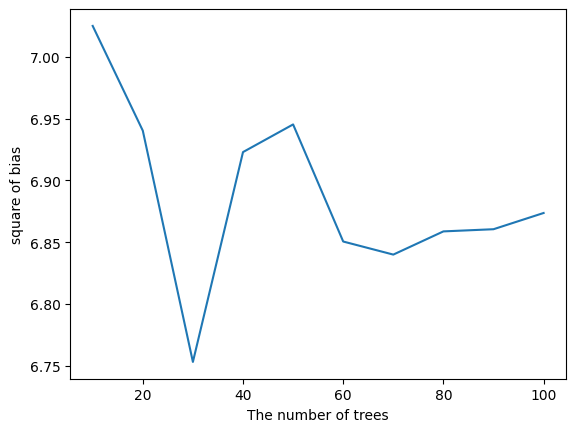

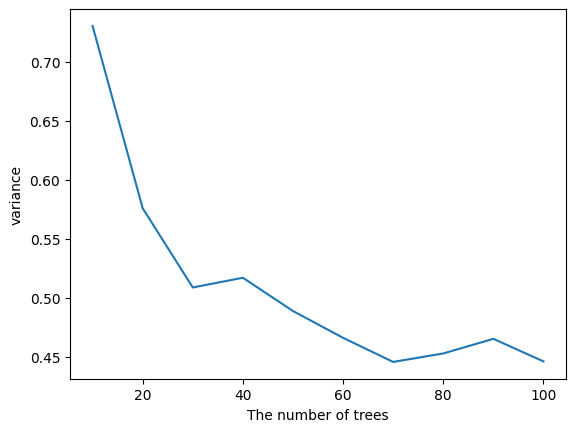

In [16]:
curves( X_train, Y_train, X_test, Y_test)
plt.show()
